Because K Means is distance-based, it's necessary to scale the data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./data/customers.csv')
data.head()

,CustomerID,Products0,Products1,Products2,Products3,Products4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,12346.0,0.00,0.00,0.00,0.00,0.00,2,-77183.60,77183.6,0.000000,0.00,0
1,12347.0,153.90,145.44,2962.26,561.00,487.40,182,5.04,249.6,23.681319,4310.00,1
2,12348.0,191.00,0.00,1500.88,63.60,41.76,31,13.20,240.0,57.975484,1797.24,1
3,12349.0,244.87,127.95,1041.44,101.49,241.80,73,6.64,300.0,24.076027,1757.55,1
4,12350.0,0.00,0.00,279.20,19.80,35.40,17,8.50,40.0,19.670588,334.40,1


In [2]:
customers = data.drop('CustomerID',axis=1)

In [3]:
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers)

In [4]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers.columns)
scaled_customers.head()

,Products0,Products1,Products2,Products3,Products4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,-0.173454,-0.125380,-0.243448,-0.211869,-0.190626,-0.391720,-26.806432,26.726708,-0.226527,-0.231001,-0.326857
1,-0.028057,0.010216,0.321253,0.723159,0.336673,0.382657,0.031802,0.022361,-0.040513,0.293432,3.059443
2,0.006993,-0.125380,0.042667,-0.105866,-0.145448,-0.266959,0.034640,0.019029,0.228864,-0.012316,3.059443
3,0.057887,-0.006090,-0.044917,-0.042714,0.070968,-0.086271,0.032359,0.039855,-0.037413,-0.017146,3.059443
4,-0.173454,-0.125380,-0.190224,-0.178868,-0.152328,-0.327188,0.033005,-0.050393,-0.072017,-0.190312,3.059443


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_nums = range(2,8)
scores = []

In [6]:
for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num)
    
    clusters = kmeans.fit_predict(scaled_customers)
    silhouette = silhouette_score(scaled_customers, clusters)

    scores.append(silhouette)

In [7]:
import matplotlib.pyplot as plt

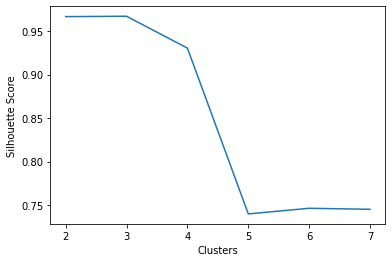

In [8]:
plt.plot(cluster_nums, scores)
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
plt.show()

In [9]:
kmeans = KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [11]:
scaler.inverse_transform(kmeans.cluster_centers_).shape

(3, 11)

<AxesSubplot:>

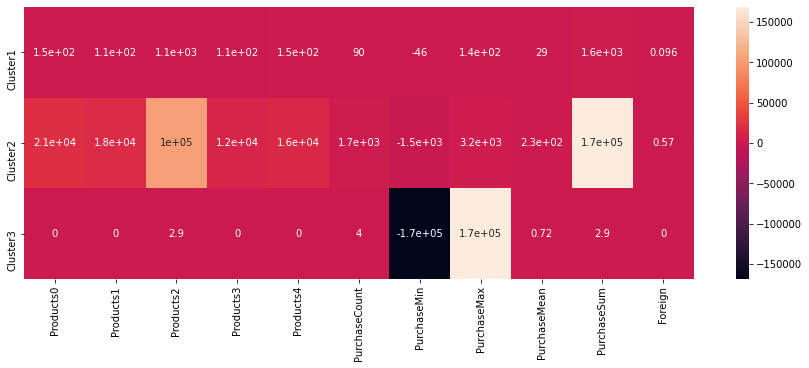

In [13]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(
    scaler.inverse_transform(kmeans.cluster_centers_),
    annot=True,
    yticklabels=['Cluster1','Cluster2','Cluster3',],
    xticklabels=scaled_customers.columns
)

In [16]:
data['Cluster'] = kmeans.labels_
data.head()

,CustomerID,Products0,Products1,Products2,Products3,Products4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign,Cluster
0,12346.0,0.00,0.00,0.00,0.00,0.00,2,-77183.60,77183.6,0.000000,0.00,0,0
1,12347.0,153.90,145.44,2962.26,561.00,487.40,182,5.04,249.6,23.681319,4310.00,1,0
2,12348.0,191.00,0.00,1500.88,63.60,41.76,31,13.20,240.0,57.975484,1797.24,1,0
3,12349.0,244.87,127.95,1041.44,101.49,241.80,73,6.64,300.0,24.076027,1757.55,1,0
4,12350.0,0.00,0.00,279.20,19.80,35.40,17,8.50,40.0,19.670588,334.40,1,0


In [17]:
data.to_csv('./data/customers_clusters.csv', index=False)